# Problem 1

A machine learning algorithm means that the algorithm can learn from data, or if its performance/ability P at a class of tasks T improves as a result of experience E. In other words, machine learning algorithms are designed to increase their performance at accomplishing a particular goal (classification or regression, typically) and lower their loss functions which indicate how well (or poorly) an algorithm is doing at said goal.

# Problem 2

## 2a.

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [181]:
def generate(N):
    x = np.random.uniform(low=-1, high=3.0, size=(N))
    y = (x**2) - (3*x) + 1
    return x,y

In [182]:
def noised(N, sigma):
    x,y = generate(N)
    noise = np.random.normal(loc=0.0, scale=sigma, size=len(y))
    yy = y + noise
    return x,y,yy

In [183]:
N_s = [15,100]
Sig_s = [0,0.05,0.2]

In [184]:
points = []
for N in N_s:
    for sigma in Sig_s:
        outs = noised(N=N,sigma=sigma)
        points.append((outs[0],outs[1],outs[2]))

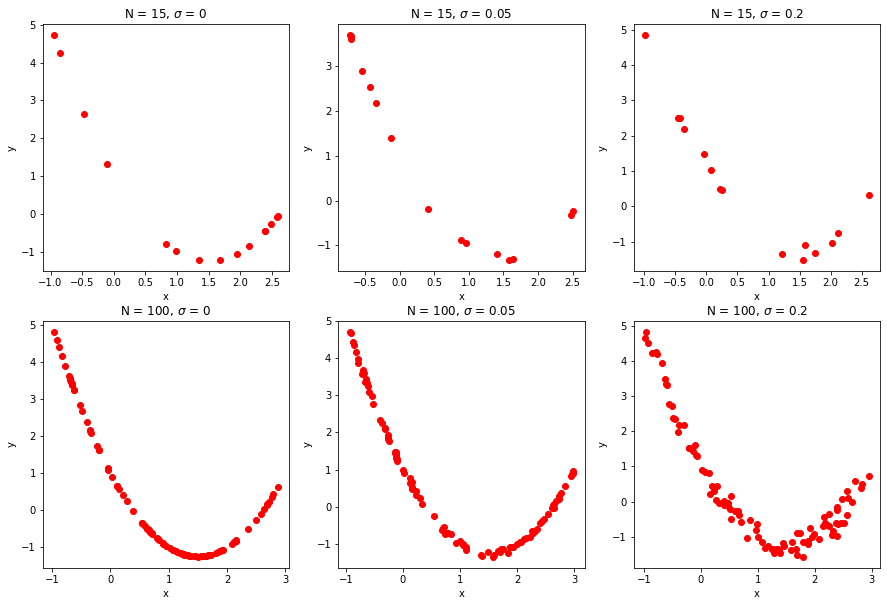

In [478]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
ax = ax.ravel()
titles = [("15","0"),("15", "0.05"),("15", "0.2"),("100","0"),("100","0.05"),("100","0.2")]
for i in range(6):
    ax[i].scatter(points[i][0],points[i][2],color="red")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_title("N = "+str(titles[i][0])+", $\sigma$ = "+str(titles[i][1]))

## 2b.

In [723]:
x0,x1,x2,x3,x4,x5 = points[0][0],points[1][0],points[2][0],points[3][0],points[4][0],points[5][0]
y0,y1,y2,y3,y4,y5 = points[0][2],points[1][2],points[2][2],points[3][2],points[4][2],points[5][2]

In [639]:
def problem2_fit_polynomial(x, y, degree, regularization = None):
    X = np.ones((len(x),degree+1))
    for i in range(degree+1):
        X[:,i] = x**(degree-i)
    if regularization != None:
        coeffs = (np.linalg.inv((regularization*np.identity(X.shape[1])+(X.T@X)))@X.T)@y
    else:
        coeffs = (np.linalg.inv((X.T@X))@X.T)@y
    return coeffs

In [640]:
def linear(x,coeffs):
    return coeffs[0]*x + coeffs[1]
def quadratic(x,coeffs):
    return coeffs[0]*(x**2) + coeffs[1]*x + coeffs[2]
def nonic(x,coeffs):
    poly = (coeffs[0]*(x**9) + (coeffs[1]*(x**8))+(coeffs[2]*(x**7))+
            (coeffs[3]*(x**6))+(coeffs[4]*(x**5))+(coeffs[5]*(x**4))+(coeffs[6]*(x**3))+
            (coeffs[7]*(x**2)) + (coeffs[8]*(x)+(coeffs[9])))
    return poly

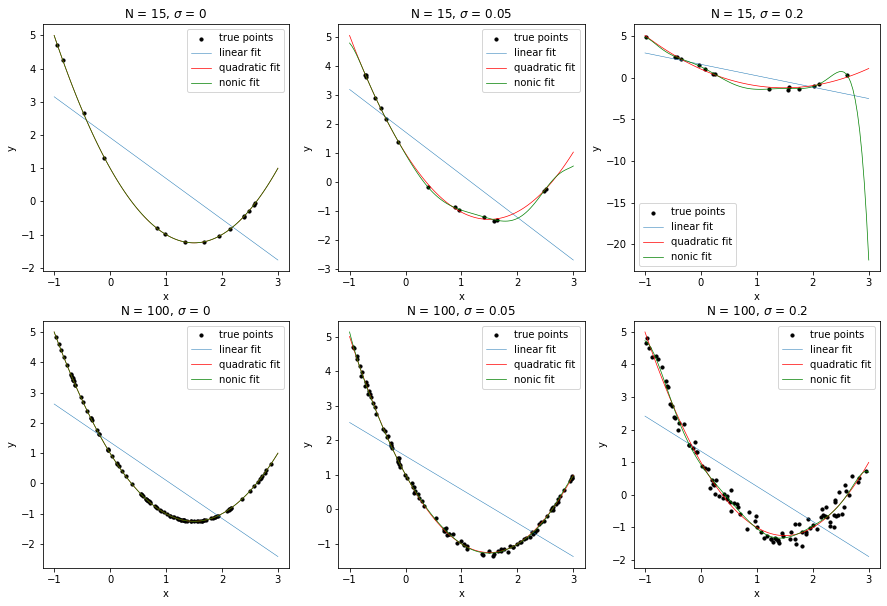

In [724]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
ax = ax.ravel()
titles = [("15","0"),("15", "0.05"),("15", "0.2"),("100","0"),("100","0.05"),("100","0.2")]
pairs = [(x0,y0),(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5)]
for i in range(6):
    ax[i].scatter(points[i][0],points[i][2],color="black",s=10,label="true points")
    first_coeffs = problem2_fit_polynomial(pairs[i][0],pairs[i][1],1, regularization = None)
    quadra_coeffs = problem2_fit_polynomial(pairs[i][0],pairs[i][1],2, regularization = None)
    non_coeffs = problem2_fit_polynomial(pairs[i][0],pairs[i][1],9, regularization = None)
    ax[i].plot(np.linspace(-1,3,100),linear(np.linspace(-1,3,100),first_coeffs),linewidth=0.5,
              label="linear fit")
    ax[i].plot(np.linspace(-1,3,100),quadratic(np.linspace(-1,3,100),quadra_coeffs),linewidth=0.7,color="red",
              label="quadratic fit")
    ax[i].plot(np.linspace(-1,3,100),nonic(np.linspace(-1,3,100),non_coeffs),linewidth=0.7,color="green",
              label="nonic fit")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].legend()
    ax[i].set_title("N = "+str(titles[i][0])+", $\sigma$ = "+str(titles[i][1]))

In [603]:
def mse(y_true,y_reg):
    y = np.array(y_true)
    y_prime = np.array(y_reg)
    mserror = (np.sum((y-y_prime)**2))/len(y)
    return mserror

In [643]:
import pandas as pd
df15 = pd.DataFrame()
df15["nonic ($\sigma$ = 0)"] = pd.Series(np.flip(problem2_fit_polynomial(x0,y0,9, regularization = None)))
df15["quadratic ($\sigma$ = 0)"] = pd.Series(problem2_fit_polynomial(x0,y0,2, regularization = None))
df15["linear ($\sigma$ = 0.0)"] = pd.Series(problem2_fit_polynomial(x0,y0,1, regularization = None))
df15["nonic ($\sigma$ = 0.05)"] = pd.Series(np.flip(problem2_fit_polynomial(x1,y1,9, regularization = None)))
df15["quadratic ($\sigma$ = 0.05)"] = pd.Series(problem2_fit_polynomial(x1,y1,2, regularization = None))
df15["linear ($\sigma$ = 0.05)"] = pd.Series(problem2_fit_polynomial(x1,y1,1, regularization = None))
df15["nonic ($\sigma$ = 0.2)"] = pd.Series(np.flip(problem2_fit_polynomial(x2,y2,9, regularization = None)))
df15["quadratic ($\sigma$ = 0.2)"] = pd.Series(problem2_fit_polynomial(x2,y2,2, regularization = None))
df15["linear ($\sigma$ = 0.2)"] = pd.Series(problem2_fit_polynomial(x2,y2,1, regularization = None))
df15.index.name = 'power of x'
df15.style.set_caption("Coefficients of polynomial fits for N = 15")

In [644]:
df100 = pd.DataFrame()
df100["nonic ($\sigma$ = 0)"] = pd.Series(np.flip(problem2_fit_polynomial(x3,y3,9, regularization = None)))
df100["quadratic ($\sigma$ = 0)"] = pd.Series(problem2_fit_polynomial(x3,y3,2, regularization = None))
df100["linear ($\sigma$ = 0.0)"] = pd.Series(problem2_fit_polynomial(x3,y3,1, regularization = None))
df100["nonic ($\sigma$ = 0.05)"] = pd.Series(np.flip(problem2_fit_polynomial(x4,y4,9, regularization = None)))
df100["quadratic ($\sigma$ = 0.05)"] = pd.Series(problem2_fit_polynomial(x4,y4,2, regularization = None))
df100["linear ($\sigma$ = 0.05)"] = pd.Series(problem2_fit_polynomial(x4,y4,1, regularization = None))
df100["nonic ($\sigma$ = 0.2)"] = pd.Series(np.flip(problem2_fit_polynomial(x5,y5,9, regularization = None)))
df100["quadratic ($\sigma$ = 0.2)"] = pd.Series(problem2_fit_polynomial(x5,y5,2, regularization = None))
df100["linear ($\sigma$ = 0.2)"] = pd.Series(problem2_fit_polynomial(x5,y5,1, regularization = None))
df100.index.name = 'power of x'
df100.style.set_caption("Coefficients of polynomial fits for N = 100")

In [665]:
dfmse = pd.DataFrame(index=['linear', 'quadratic', 'nonic'])
dfmse["N = 15, $\sigma$ = 0"] = [mse(y0,linear(x0,problem2_fit_polynomial(x0,y0,1))),
                                 mse(y0,quadratic(x0,problem2_fit_polynomial(x0,y0,2))),
                                 mse(y0,nonic(x0,problem2_fit_polynomial(x0,y0,9)))] 
dfmse["N = 15, $\sigma$ = 0.05"] = [mse(y1,linear(x1,problem2_fit_polynomial(x1,y1,1))),
                                 mse(y1,quadratic(x1,problem2_fit_polynomial(x1,y1,2))),
                                 mse(y1,nonic(x1,problem2_fit_polynomial(x1,y1,9)))] 
dfmse["N = 15, $\sigma$ = 0.2"] = [mse(y2,linear(x2,problem2_fit_polynomial(x2,y2,1))),
                                 mse(y2,quadratic(x2,problem2_fit_polynomial(x2,y2,2))),
                                 mse(y2,nonic(x2,problem2_fit_polynomial(x2,y2,9)))] 
dfmse["N = 100, $\sigma$ = 0"] = [mse(y3,linear(x3,problem2_fit_polynomial(x3,y3,1))),
                                 mse(y3,quadratic(x3,problem2_fit_polynomial(x3,y3,2))),
                                 mse(y3,nonic(x3,problem2_fit_polynomial(x3,y3,9)))] 
dfmse["N = 100, $\sigma$ = 0.05"] = [mse(y4,linear(x4,problem2_fit_polynomial(x4,y4,1))),
                                 mse(y4,quadratic(x4,problem2_fit_polynomial(x4,y4,2))),
                                 mse(y4,nonic(x4,problem2_fit_polynomial(x4,y4,9)))] 
dfmse["N = 100, $\sigma$ = 0.2"] = [mse(y5,linear(x5,problem2_fit_polynomial(x5,y5,1))),
                                 mse(y5,quadratic(x5,problem2_fit_polynomial(x5,y5,2))),
                                 mse(y5,nonic(x5,problem2_fit_polynomial(x5,y5,9)))] 
dfmse.style.set_caption("Table of mean-squared errors for polynomial fits")

Qualitatively, it appears as though the most noticeable overfitting is for the nonic fit for N = 15, with sigma = 0.05 and 0.2 (the curve is not super quadratic in appearance and overly tries to capture the noise applied to the points). The linear curves underfit for all the data, and is generally a bad predictor of where points will end up, especially because the concavity switches in the true data which is not captured in the linear fit (and this is reinforced by the errors in linear fits which are orders of magnitudes greater than quadratic or nonic). The linear fit has the smallest MSE error (out of all the linear errors we observe) for N = 15, sigma = 0.2, suggesting that this set of points is just in the right combination of noise and random configuration that it behaves a bit more linearly than in other configurations. Generally, the best fits appear to be quadratic and nonic for sigma = 0 for both N = 15 and N = 100, which makes sense since these points adhere perfectly to the polynomial and thus track well with the coefficients found. 

## 2c.

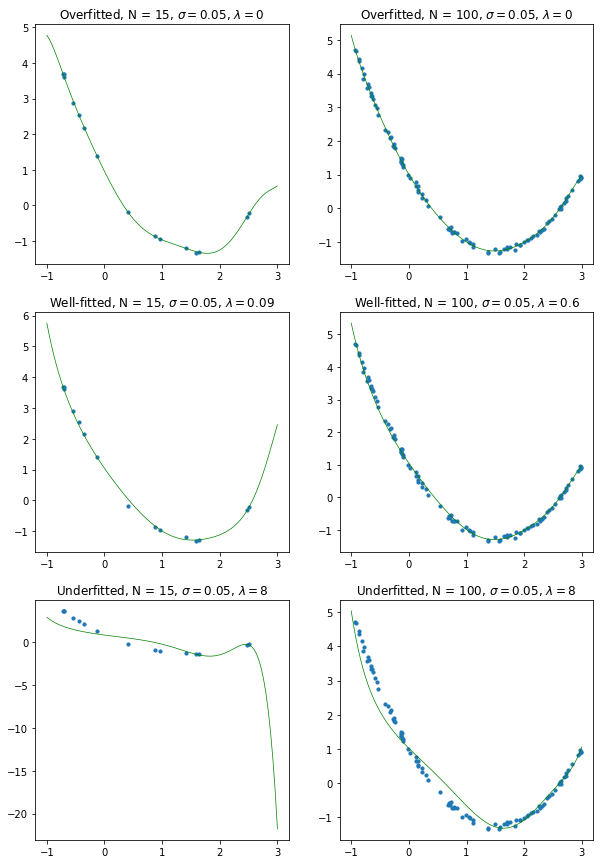

In [738]:
fig, ax = plt.subplots(3,2,figsize=(10,15))
ax[0,0].scatter(x1,y1,s=10)
ax[0,1].scatter(x4,y4,s=10)
over_coeffs_1 = problem2_fit_polynomial(x1,y1,9, regularization = 0)
over_coeffs_4 = problem2_fit_polynomial(x4,y4,9, regularization = 0)
ax[0,0].set_title("Overfitted, N = 15, $\sigma = 0.05$, $\lambda = 0$")
ax[0,0].plot(np.linspace(-1,3,100),nonic(np.linspace(-1,3,100),over_coeffs_1),linewidth=0.7,color="green",
              label="nonic fit")
ax[0,1].plot(np.linspace(-1,3,100),nonic(np.linspace(-1,3,100),over_coeffs_4),linewidth=0.7,color="green",
              label="nonic fit")
ax[0,1].set_title("Overfitted, N = 100, $\sigma = 0.05$, $\lambda = 0$")
perf_coeffs_1 = problem2_fit_polynomial(x1,y1,9, regularization = 0.09)
perf_coeffs_4 = problem2_fit_polynomial(x4,y4,9, regularization = 0.6)
ax[1,0].plot(np.linspace(-1,3,100),nonic(np.linspace(-1,3,100),perf_coeffs_1),linewidth=0.7,color="green",
              label="nonic fit")
ax[1,0].set_title("Well-fitted, N = 15, $\sigma = 0.05$, $\lambda = 0.09$")
ax[1,1].plot(np.linspace(-1,3,100),nonic(np.linspace(-1,3,100),perf_coeffs_4),linewidth=0.7,color="green",
              label="nonic fit")
ax[1,1].set_title("Well-fitted, N = 100, $\sigma = 0.05$, $\lambda = 0.6$")
ax[1,0].scatter(x1,y1,s=10)
ax[1,1].scatter(x4,y4,s=10)
under_coeffs_1 = problem2_fit_polynomial(x1,y1,9, regularization = 8)
under_coeffs_4 = problem2_fit_polynomial(x4,y4,9, regularization = 8)
ax[2,0].plot(np.linspace(-1,3,100),nonic(np.linspace(-1,3,100),under_coeffs_1),linewidth=0.7,color="green",
              label="nonic fit")
ax[2,0].set_title("Underfitted, N = 15, $\sigma = 0.05$, $\lambda = 8$")
ax[2,1].plot(np.linspace(-1,3,100),nonic(np.linspace(-1,3,100),under_coeffs_4),linewidth=0.7,color="green",
              label="nonic fit")
ax[2,0].scatter(x1,y1,s=10)
ax[2,1].set_title("Underfitted, N = 100, $\sigma = 0.05$, $\lambda = 8$")
ax[2,1].scatter(x4,y4,s=10)

In [733]:
dfreg = pd.DataFrame()
dfreg["nonic (N = 15, $\lambda$ = 0)"] = pd.Series(np.flip(problem2_fit_polynomial(x1,y1,9, regularization = 0)))
dfreg["nonic (N = 100, $\lambda$ = 0)"] = pd.Series(np.flip(problem2_fit_polynomial(x4,y4,9, regularization = 0)))
dfreg["nonic (N = 15, $\lambda$ = 0.09)"] = pd.Series(np.flip(problem2_fit_polynomial(x1,y1,9, regularization = 0.09)))
dfreg["nonic (N = 100, $\lambda$ = 0.6)"] = pd.Series(np.flip(problem2_fit_polynomial(x4,y4,9, regularization = 0.6)))
dfreg["nonic (N = 15, $\lambda$ = 8)"] = pd.Series(np.flip(problem2_fit_polynomial(x1,y1,9, regularization = 8)))
dfreg["nonic (N = 100, $\lambda$ = 8)"] = pd.Series(np.flip(problem2_fit_polynomial(x4,y4,9, regularization = 8)))
dfreg.index.name = 'power of x'
dfreg.style.set_caption("Coefficients of polynomial fits with N = 5, 100 and varying regularization")

In [734]:
dfmse2 = pd.DataFrame()
dfmse2["N = 15, $\lambda$ = 0"] = [mse(y1,nonic(x1,problem2_fit_polynomial(x1,y1,9,regularization=0)))] 
dfmse2["N = 100, $\lambda$ = 0"] = [mse(y4,nonic(x4,problem2_fit_polynomial(x4,y4,9,regularization=0)))]
dfmse2["N = 15, $\lambda$ = 0.09"] = [mse(y1,nonic(x1,problem2_fit_polynomial(x1,y1,9,regularization=0.09)))]
dfmse2["N = 100, $\lambda$ = 0.6"] = [mse(y4,nonic(x4,problem2_fit_polynomial(x4,y4,9,regularization=0.6)))]
dfmse2["N = 15, $\lambda$ = 8"] = [mse(y1,nonic(x1,problem2_fit_polynomial(x1,y1,9,regularization=8)))]
dfmse2["N = 100, $\lambda$ = 8"] = [mse(y4,nonic(x4,problem2_fit_polynomial(x4,y4,9,regularization=8)))]
dfmse2.style.set_caption("Table of mean-squared errors for polynomial fits with varying regularization")

# Problem 3

## 3a.

In [48]:
data = np.genfromtxt('/Users/amandab/Desktop/2021/Deep Learning/Assignment 1/data/problem3_data_seed.dat')

In [92]:
data

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [99]:
X, Y = data[:,:7],data[:,7]

In [100]:
def normalize(x):
    minx = min(x)
    maxx = max(x)
    normed = (x - minx) /(maxx - minx)
    return normed

In [101]:
norm_X = np.zeros((X.shape[0], X.shape[1]) )
for g in range(X.shape[1]):
    norm_X[:,g] = normalize(X[:,g])

## 3b.

In [53]:
from sklearn.neighbors import NearestNeighbors
import statistics
import collections
import random

In [226]:
def classify_kn(k,train_x,train_y,test_data):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(train_x,train_y)
    y_pred = []
    for g in range(test_data.shape[0]):
        r, ind = neighbors.kneighbors([test_data[g]])
        if len(statistics.multimode(train_y[ind[0]])) > 1:
            choices = statistics.multimode(train_y[ind[0]])
            majority = np.random.choice(choices)
        else: 
            majority = statistics.mode(train_y[ind[0]])
        y_pred.append(majority)
    return y_pred

### Leave-one-out cross validation

#### Test Error

In [711]:
k_vals = [1,5,10,15]
accuracies = []
for k in k_vals:
    score = []
    for j in range(norm_X.shape[0]):
        #validation_index = np.random.randint(low=0,high=norm_X.shape[0])
        validation_index = j
        validation_set = norm_X[validation_index]
        training_set_x = np.delete(norm_X, validation_index, 0)
        training_set_y = np.delete(Y, validation_index, 0)
        pred = classify_kn(k,training_set_x,training_set_y,validation_set.reshape(-1, 1).T)
        if pred[0] == Y[validation_index]:
            score.append(1)
        else:
            score.append(0)
    accuracies.append(len(np.nonzero(score)[0])/len(score))

In [712]:
#Accuracies for k = 1, 5, 10, 15 
accuracies

[0.9428571428571428, 0.9285714285714286, 0.9142857142857143, 0.919047619047619]

[0.05714285714285716, 0.0714285714285714, 0.08571428571428574, 0.080952380952381]


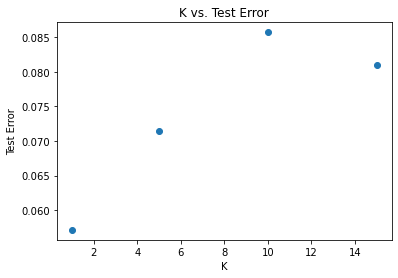

In [714]:
fig, ax = plt.subplots()
errors = [(1-j) for j in accuracies]
print(errors)

ax.scatter(k_vals,errors)
ax.set_title("K vs. Test Error")
ax.set_xlabel("K")
ax.set_ylabel("Test Error")
plt.show()

#### Training Error

In [715]:
k_vals = [1,5,10,15]
accuracies = []
for k in k_vals:
    split_score = []
    for j in range(norm_X.shape[0]):
        score = []
        validation_index = j
        validation_set = norm_X[validation_index]
        training_set_x = np.delete(norm_X, validation_index, 0)
        training_set_y = np.delete(Y, validation_index, 0)
        #Setting training set as test set to find training error
        pred = classify_kn(k,training_set_x,training_set_y,training_set_x)
        for m in range(len(pred)):
            if pred[m] == training_set_y[m]:
                score.append(1)
            else:
                score.append(0)
        split_score.append((len(np.nonzero(score)[0])/len(score)))
    accuracies.append(np.mean(split_score))

In [716]:
#Accuracies for k = 1, 5, 10, 15 for training error
accuracies

[1.0, 0.957211209842789, 0.9356801093643198, 0.9282524493050808]

In [717]:
#Training errors for k = 1, 5, 10, 15
errors = [(1-j) for j in accuracies]
errors

[0.0, 0.04278879015721104, 0.06431989063568022, 0.07174755069491923]

### 5-fold cross validation

In [400]:
all_inds = list(range(0,210))

In [401]:
a_set_inds = np.random.choice(all_inds,size=int(norm_X.shape[0]/5),replace=False)
all_minusA = [el for el in all_inds if el not in a_set_inds]
b_set_inds = np.random.choice(all_minusA,size=int(norm_X.shape[0]/5),replace=False)
all_minusAB = [el for el in all_minusA if el not in b_set_inds]
c_set_inds = np.random.choice(all_minusAB,size=int(norm_X.shape[0]/5),replace=False)
all_minusABC = [el for el in all_minusAB if el not in c_set_inds]
d_set_inds = np.random.choice(all_minusABC,size=int(norm_X.shape[0]/5),replace=False)
e_set_inds = [el for el in all_minusABC if el not in d_set_inds]

#### Test Error

In [718]:
k_vals = [1,5,10,15]
test_accuracies = []
train_accuracies = []
sets = [a_set_inds,b_set_inds,c_set_inds,d_set_inds,e_set_inds]
for k in k_vals:
    test_split_scores = []
    train_split_scores = []
    for i in range(len(sets)):
        test_score = []
        train_score = []
        split_set = sets[i]
        remainders = [num for num in range(len(sets)) if (num !=i)]
        validation_set = norm_X[split_set]
        new_a,new_b, new_c,new_d= sets[remainders[0]],sets[remainders[1]],sets[remainders[2]],sets[remainders[3]]
        training_set_x = np.concatenate((norm_X[new_a],norm_X[new_b],norm_X[new_c],norm_X[new_d]),axis=0)
        training_set_y = np.concatenate((Y[new_a],Y[new_b],Y[new_c],Y[new_d]),axis=0)
        test_pred = classify_kn(k,training_set_x,training_set_y,validation_set)
        train_pred = classify_kn(k,training_set_x,training_set_y,training_set_x)
        
        true = Y[split_set]
        for m in range(len(test_pred)):
            if test_pred[m] == true[m]:
                test_score.append(1)
            else:
                test_score.append(0)
        
        for n in range(len(train_pred)):
            if train_pred[n] == training_set_y[n]:
                train_score.append(1)
            else:
                train_score.append(0)
                
        test_split_scores.append(len(np.nonzero(test_score)[0])/len(test_score))
        train_split_scores.append(len(np.nonzero(train_score)[0])/len(train_score))
    
    test_accuracies.append(np.mean(test_split_scores))
    train_accuracies.append(np.mean(train_split_scores))

In [719]:
#Accuracies for k = 1, 5, 10, 15 for test error
test_accuracies

[0.9380952380952381,
 0.9238095238095237,
 0.9142857142857143,
 0.9095238095238095]

[0.06190476190476191, 0.07619047619047625, 0.08571428571428574, 0.09047619047619049]


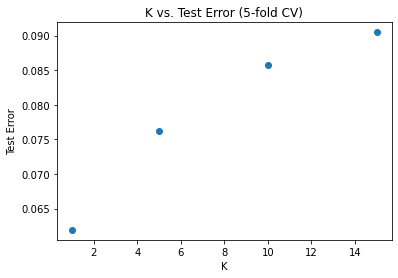

In [720]:
fig, ax = plt.subplots()
errors = [(1-j) for j in test_accuracies]
print(errors)

ax.scatter(k_vals,errors)
ax.set_title("K vs. Test Error (5-fold CV)")
ax.set_xlabel("K")
ax.set_ylabel("Test Error")
plt.show()

#### Training Error

In [721]:
#Accuracies for k = 1, 5, 10, 15 for test error
train_accuracies

[1.0, 0.9523809523809523, 0.930952380952381, 0.9333333333333333]

In [722]:
#Training errors for k = 1, 5, 10, 15
errors = [(1-j) for j in train_accuracies]
errors

[0.0, 0.04761904761904767, 0.06904761904761902, 0.06666666666666665]

Overall, the KNN classifier seems to overfit for k = 1, since it measures the nearest point (which is the point itself) for the training data, consistently scoring 100%. It performs less consistently on test data, scoring around 93% or 94% even for k = 1. As k increases, the difference between test errors and training errors appear to get slimmer which suggestes that the overfitting has decreased, but overall decrease in the test score to ~90% (and below, for some runs) suggests that the model may be underfitting slightly for higher k (around k=10 and greater). 

## 3c.

### RandomForestClassifier

In [710]:
from sklearn.ensemble import RandomForestClassifier

In [705]:
# 5-Fold Cross Validation 

sets = [a_set_inds,b_set_inds,c_set_inds,d_set_inds,e_set_inds]

test_split_scores = []
train_split_scores = []
for i in range(len(sets)):
    test_score = []
    train_score = []
    split_set = sets[i]
    remainders = [num for num in range(len(sets)) if (num !=i)]
    validation_set = norm_X[split_set]
    new_a,new_b, new_c,new_d= sets[remainders[0]],sets[remainders[1]],sets[remainders[2]],sets[remainders[3]]
    training_set_x = np.concatenate((norm_X[new_a],norm_X[new_b],norm_X[new_c],norm_X[new_d]),axis=0)
    training_set_y = np.concatenate((Y[new_a],Y[new_b],Y[new_c],Y[new_d]),axis=0)
        
    clf = RandomForestClassifier()
    clf.fit(training_set_x,training_set_y)
    test_pred = clf.predict(validation_set)
    train_pred = clf.predict(training_set_x)
        
    true = Y[split_set]
    for m in range(len(test_pred)):
        if test_pred[m] == true[m]:
            test_score.append(1)
        else:
            test_score.append(0)
        
    for n in range(len(train_pred)):
        if train_pred[n] == training_set_y[n]:
            train_score.append(1)
        else:
            train_score.append(0)
                
    test_split_scores.append(len(np.nonzero(test_score)[0])/len(test_score))
    train_split_scores.append(len(np.nonzero(train_score)[0])/len(train_score))

test_errors = [(1-j) for j in test_split_scores]
train_errors = [(1-j) for j in train_split_scores]

#print(train_errors)
print("Training error is: ", np.mean(train_errors))
print("Testing error is: ", np.mean(test_errors))
#print("Accuracy is: ", np.mean(split_scores))

Training error is:  0.0
Testing error is:  0.06190476190476191


In [709]:
# Leave one out cross validation
test_split_scores = []
train_split_scores = []
for j in range(norm_X.shape[0]):

    train_score = []
    validation_index = j
    validation_set = norm_X[validation_index]
    training_set_x = np.delete(norm_X, validation_index, 0)
    training_set_y = np.delete(Y, validation_index, 0)
    
    clf = RandomForestClassifier()
    clf.fit(training_set_x,training_set_y)
    test_pred = clf.predict(validation_set.reshape(-1, 1).T)
    train_pred = clf.predict(training_set_x)
    
    if test_pred[0] == Y[validation_index]:
        test_split_scores.append(1)
    else:
        test_split_scores.append(0)
        
    for m in range(len(train_pred)):
            if train_pred[m] == training_set_y[m]:
                train_score.append(1)
            else:
                train_score.append(0)
    train_split_scores.append((len(np.nonzero(train_score)[0])/len(train_score)))

print("Training error is: ", (1-np.mean(train_split_scores)))
print("Testing error is: ", (1-((len(np.nonzero(test_split_scores)[0])/len(test_split_scores)))))

Training error is:  0.0
Testing error is:  0.05714285714285716


### GradientBoostingClassifier

In [706]:
from sklearn.ensemble import GradientBoostingClassifier

In [708]:
# 5-Fold Cross Validation

sets = [a_set_inds,b_set_inds,c_set_inds,d_set_inds,e_set_inds]

test_split_scores = []
train_split_scores = []
for i in range(len(sets)):
    test_score = []
    train_score = []
    split_set = sets[i]
    remainders = [num for num in range(len(sets)) if (num !=i)]
    validation_set = norm_X[split_set]
    new_a,new_b, new_c,new_d= sets[remainders[0]],sets[remainders[1]],sets[remainders[2]],sets[remainders[3]]
    training_set_x = np.concatenate((norm_X[new_a],norm_X[new_b],norm_X[new_c],norm_X[new_d]),axis=0)
    training_set_y = np.concatenate((Y[new_a],Y[new_b],Y[new_c],Y[new_d]),axis=0)
        
    clf = GradientBoostingClassifier()
    clf.fit(training_set_x,training_set_y)
    test_pred = clf.predict(validation_set)
    train_pred = clf.predict(training_set_x)
        
    true = Y[split_set]
    for m in range(len(test_pred)):
        if test_pred[m] == true[m]:
            test_score.append(1)
        else:
            test_score.append(0)
        
    for n in range(len(train_pred)):
        if train_pred[n] == training_set_y[n]:
            train_score.append(1)
        else:
            train_score.append(0)
                
    test_split_scores.append(len(np.nonzero(test_score)[0])/len(test_score))
    train_split_scores.append(len(np.nonzero(train_score)[0])/len(train_score))

test_errors = [(1-j) for j in test_split_scores]
train_errors = [(1-j) for j in train_split_scores]

#print(train_errors)
print("Training error is: ", np.mean(train_errors))
print("Testing error is: ", np.mean(test_errors))
#print("Accuracy is: ", np.mean(split_scores))

Training error is:  0.0
Testing error is:  0.04761904761904763


In [707]:
# Leave one out cross validation
test_split_scores = []
train_split_scores = []
for j in range(norm_X.shape[0]):
    #validation_index = np.random.randint(low=0,high=norm_X.shape[0])
    train_score = []
    validation_index = j
    validation_set = norm_X[validation_index]
    training_set_x = np.delete(norm_X, validation_index, 0)
    training_set_y = np.delete(Y, validation_index, 0)
    
    clf = GradientBoostingClassifier()
    clf.fit(training_set_x,training_set_y)
    test_pred = clf.predict(validation_set.reshape(-1, 1).T)
    train_pred = clf.predict(training_set_x)
    
    if test_pred[0] == Y[validation_index]:
        test_split_scores.append(1)
    else:
        test_split_scores.append(0)
        
    for m in range(len(train_pred)):
            if train_pred[m] == training_set_y[m]:
                train_score.append(1)
            else:
                train_score.append(0)
    train_split_scores.append((len(np.nonzero(train_score)[0])/len(train_score)))

print("Training error is: ", (1-np.mean(train_split_scores)))
print("Testing error is: ", (1-((len(np.nonzero(test_split_scores)[0])/len(test_split_scores)))))

Training error is:  0.0
Testing error is:  0.06666666666666665


Overall, both the training errors for the GradientBoostingClassifier and the RandomForestClassifier are effecitvely 0, while the testing errors range from ~4 to ~7 percent. As such, it seems as though these models are overfitting to the data slightly. In general, the sklearn built-in classifiers appear to perform better than the KNN neighor classifier I implemented on the test data, especially for values of k >= 5. Between the sklearn classifiers, the GradientBoostingClassifier performs very slightly better than the RandomForestClassifier.

# Problem 4

## 4a.

We can take the perceptron rule as shown in Nielsen Ch1:
\begin{cases}
            \text{output } 0 \text{ if } w \cdot x + b \le 0\\
    \text{output } 1 \text{ if } w \cdot x + b > 0
\end{cases}

and multiply the weights $w$ and biases $b$ by some constant $c$:
\begin{cases}
            \text{output } 0 \text{ if } cw \cdot x + cb \le 0\\
    \text{output } 1 \text{ if } cw \cdot x + cb > 0
\end{cases}

Since $c$ can be factored out as shown (since it's just a constant applied to each element of $x$ as is $w$), we get:
\begin{cases}
            \text{output } 0 \text{ if } c(w \cdot x + b) \le 0\\
    \text{output } 1 \text{ if } c(w \cdot x + b) > 0
\end{cases}

We can divide the R.H.S by $c$ to eliminate the factor, but since $\frac{0}{c} = 0$, the result is the same as the initial conditions, so the perceptron behavior is unaffected.

## 4b.

The design of the network of sigmoids (without a constant multiplier) is as follows (again from Nielsen):

output = $\frac{1}{1 + \exp{(-(w \cdot x + b))}}$

Applying the constant $c$ we get:


output = $\frac{1}{1 + \exp{(-(cw \cdot x + cb))}}$ = $\frac{1}{1 + \exp((c))\exp{(-(w \cdot x + b))}}$ by power rules.

If $c \rightarrow \infty$ and $w \cdot x + b > 0$, the power in the exponent will be extremely large and extremely negative (approaching $-\infty$), so this term will behave as $\frac{1}{e^{\infty}}$ which goes to 0. We are then left with $\frac{1}{1} = 1$, which is the output we expect for the typical perceptron with $w \cdot x + b > 0$.

Alternatively, if $c \rightarrow \infty$ and $w \cdot x + b < 0$, the exponential term will "blow up" as $e^\infty$ and the 1 in the denominator term becomes negligible, so the function will behave like $\frac{1}{\infty}$ which goes to 0. This is the output we expect for the perceptron network with $w \cdot x + b < 0$.

If $w \cdot x + b = 0$, the exponential term will behave as $e^0 = 1$, so the sigmoid network will have a value of $\frac{1}{1+1} = 0.5$ even for very large $c$, which is not an acceptable value for a perceptron output.

## 4c.

In [599]:
def perceptron(x1,x2,x3):
    layer1top = (-0.4 + (0.6*x1 + 0.5*x2 - 0.6*x3))
    layer1bottom = (-0.5 + (-0.7*x1 + 0.4*x2 + 0.8*x3))
    
    if layer1top <= 0:
        layer1top = 0
    elif layer1top > 0:
        layer1top = 1
    if layer1bottom <= 0:
        layer1bottom = 0
    elif layer1bottom > 0:
        layer1bottom = 1
    
    output = -0.5 + 1*(layer1top) + 1*(layer1bottom)
    if output <= 0:
        output = 0
    else:
        output = 1
    return output

In [600]:
inputs = [(0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1)]
for inp in inputs:
    x1,x2,x3 = inp[0],inp[1],inp[2]
    print(perceptron(x1,x2,x3))

0
1
1
1
1
0
1
1


## 4d.

In [601]:
def sigmoid(x1,x2,x3):
    layer1top = (-0.4 + (0.6*x1 + 0.5*x2 - 0.6*x3))
    layer1bottom = (-0.5 + (-0.7*x1 + 0.4*x2 + 0.8*x3))
    
    layer1top = 1/(1 + np.exp(-layer1top))
    layer1bottom = 1/(1 + np.exp(-layer1bottom))
    
    output = 1/(1 + np.exp(-(-0.5 + 1*(layer1top) + 1*(layer1bottom))))
    return output

In [602]:
inputs = [(0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1)]
for inp in inputs:
    x1,x2,x3 = inp[0],inp[1],inp[2]
    print(sigmoid(x1,x2,x3))

0.5692650013354738
0.5850122870764839
0.6224593312018545
0.6331439900185164
0.569867165880021
0.5750840158888638
0.6173258807992257
0.6283113278311999


## 4e.

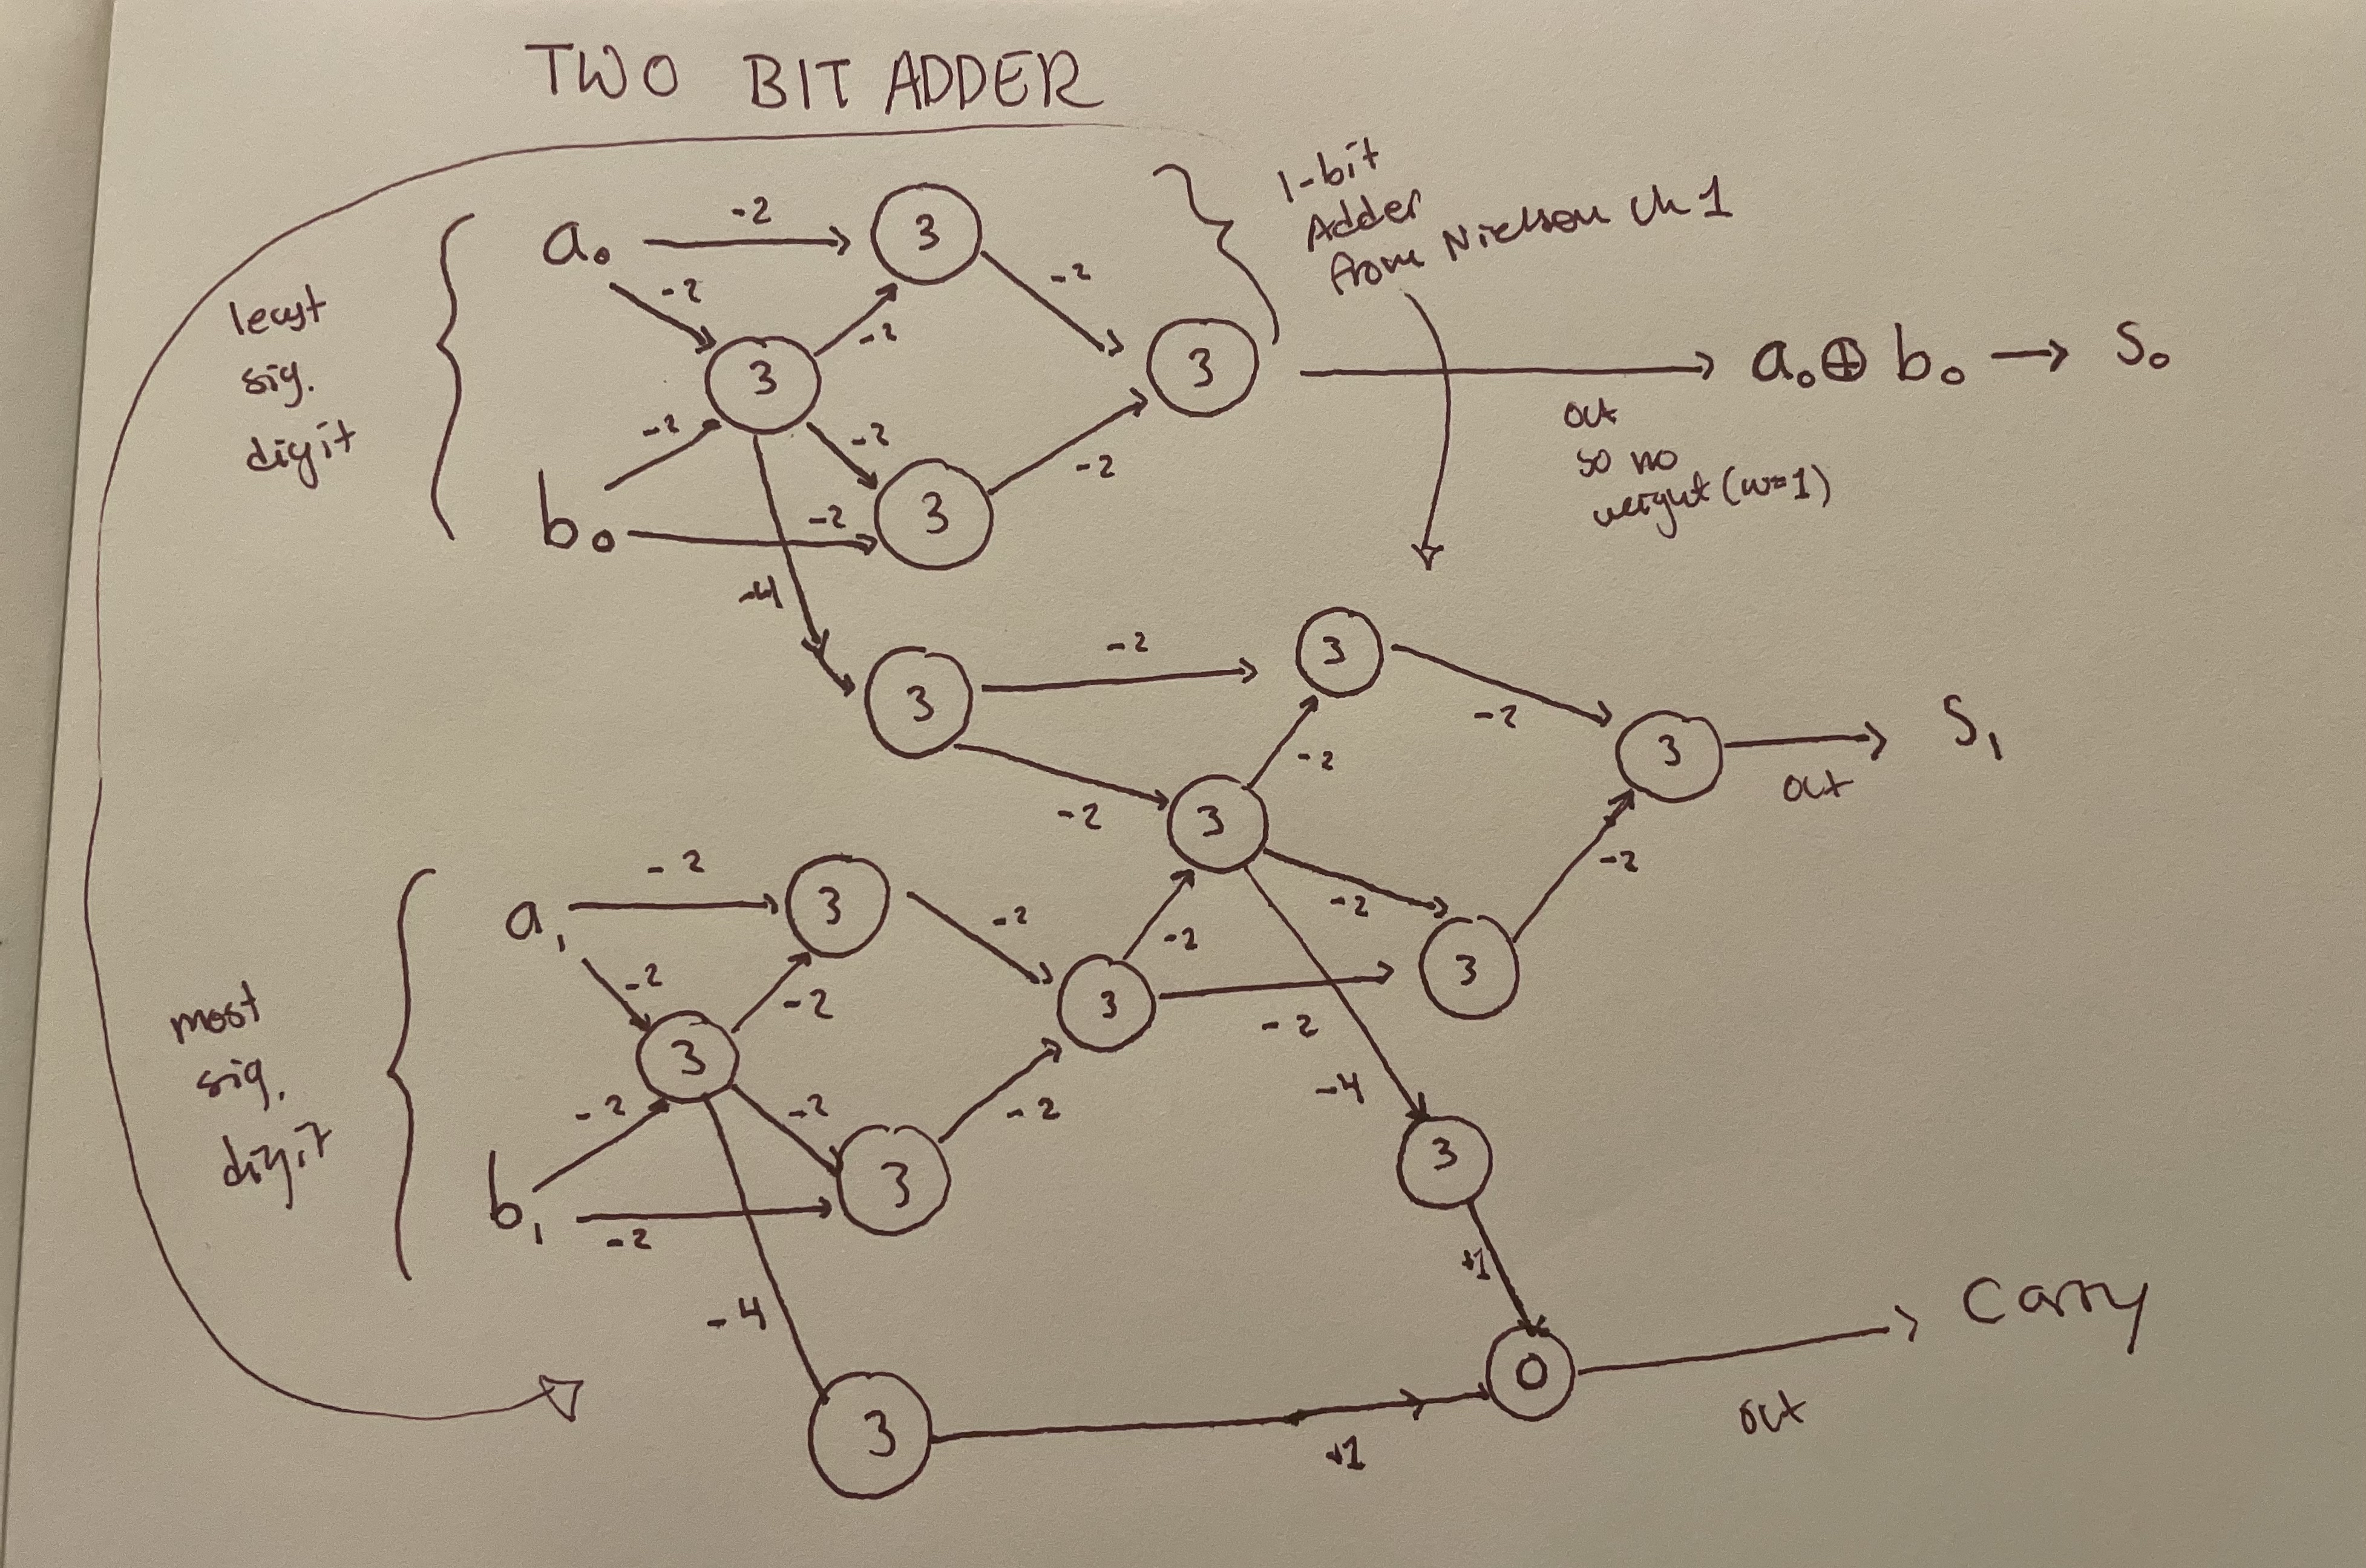

# Problem 5

## 5.1: NN Experimentation Table

| Learning Rate| Epoch # (0 incl.) | # Hidden Layers |# Hidden Layer Neurons| # of ReLu| # of Sigmoid |# of Softmax| Train Score (%) | Test Score (%)| 
| ----------- | ----------- |-------------|-|----------|--------------|------------|-------------|-----------|
| 0.005       | 200         | 3           | 64|0        |1             | 0          |98.17     |95.45     |
| 0.001       | 150         |3            |64|1         |1             |0           |97.45     | 91.95     |
|0.008        |100          |3            |64|1         |1             |0           |97.01     |94.55|
|0.005        | 170         |3            |64|1         |1             |0           | 98.44    |95.53 |
|0.005        |90           |1            |64|1         |0             |1           |70.99     |65.85|
|0.005        |90           |3            |64|1         |1             |1           |94.87     |92.05|
|0.005        |90          | 4           | 64|1         |1             |0           |96.83     | 94.89|
|0.005        |140         | 3           |64|1         |1             |0           | 100      | 96.85|
|0.006        |90          |3            |64|3        |0              |0           |100       |96.8|
|0.0065       |70          |4            |64|0        |2              |0           |93.99     | 91.35|
|0.0065       |90          |4            | 64|2       |0              |0           | 99.785   | 96.45|
|0.0065       | 30         |4            |64|2        |0              |0           |99.97     | 97.3 |
|0.0065       | 30         |4            |100|2        |0              |0           |99.99|96.6|
|0.0065       | 29         |4            |200|2        |0              |0           |100|97.3|

## 5.2

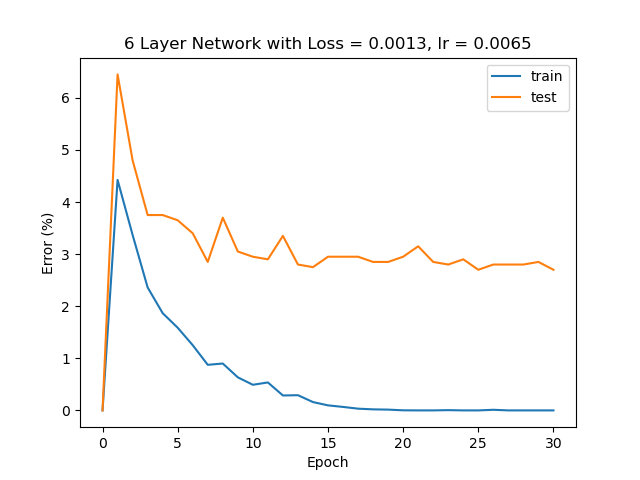

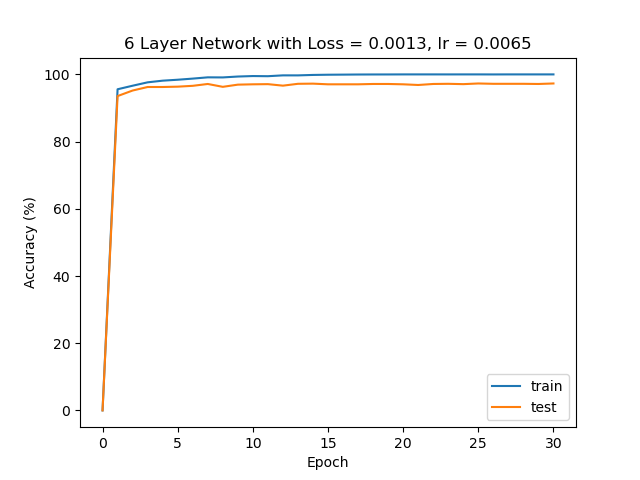

The number of iterations needed for good accuracy/low error varies appeared to depend heavily on the learning rate of the model (and whether it needs more epochs to reach an approximate asymptotic value for test error). Once this point is reached, however, where the test error changes little, leaving the model running for too many more epochs might increase the training error, but the test error may end up worsening as a whole (as the model begins to overfit). I found that if the training error (TE) reaches 0% then the likelihood of overfitting becomes predominant as more epochs run with TE remaining at 100%. For my best-performing-model with max test accuracy of 97.3, TE = 0%, and lr = 0.0065, I found that fewer epochs (25-40) performed better than higher (100+) epochs. For lower learning rates, I found that more epochs helped the value reach its peak, though this was often lower than my best model with fewer epochs and a higher learning rate. On the other hand, if the learning rate was too low accuracy stayed poor typically regardless of number of iterations. The plots above show my error and accuracy for my best-performing model; my best accuracy ocurred at 30 total epochs but after this value is appeared to become fairly constant with minor fluctuations.

## 5.3

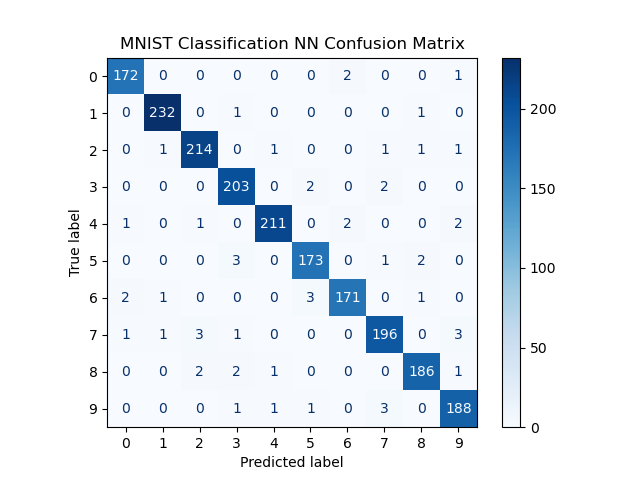

The confusion matrix above shows that 0 was a number classified correctly 98.2% (172/175) of the time, 1 was classified correctly 99.1% of the time (232/234), making these two digits the ones classified correctly most frequently. The number that was classified incorrectly the most was 7, at 95.6% (196/205).

## 5.4

My best performing model was a six-layer model composed of linear layers and the ReLu nonlinear activation function applied between the 1st and 2nd layers and the 5th and 6th layers. The hidden layers had 200 neurons. This model consistently scored in the high 96% to low 97% accuracy range, I varied the learning rate and the number of epochs to achieve a peak accuracy score of 97.3% (test) and 100% (train) on the 30th epoch. After increasing the number of epochs to 50 and beyond, but the accuracy dwindled slightly suggesting that overfitting occured. Beyond this, I used the SGD optimizer and the Cross Entropy Loss in my model.